<a href="https://colab.research.google.com/github/aakarshhh/AI_ML/blob/main/StockLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
pip install yfinance 

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as dr
import datetime as dt 
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import  Dense , Dropout ,LSTM ,BatchNormalization

In [23]:
company = 'INFY'
ep = 31

In [24]:
sc = MinMaxScaler(feature_range=(0,1))
pred_days = 45

one_day = 192 #timestamps
c = 'MSFT INFY RELIANCE '
start = dt.datetime(2006,1,1)
end = dt.datetime(2021,1,1)

data = yf.download(
        tickers = f'{c}',
        start =start, end=end,
        group_by = 'ticker',
        auto_adjust = True,
        prepost = True)
company = 'INFY'

data = pd.DataFrame(data)
data = data[ f'{company}' ]
sdata =sc.fit_transform(data['Close'].values.reshape(-1,1))

x_train=[]
y_train=[]
for x in range(pred_days,len(data)):
  x_train.append(sdata[x-pred_days :x ])
  y_train.append(sdata[x])
x_train,y_train =np.array(x_train),np.array(y_train)


[*********************100%***********************]  3 of 3 completed

1 Failed download:
- RELIANCE: No data found, symbol may be delisted


In [25]:
x_train= np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape,y_train.shape

((3731, 45, 1), (3731, 1))

In [26]:
model= Sequential()

model.add(LSTM( units = 32 , return_sequences=True,input_shape=x_train[0].shape , recurrent_dropout=0.2))
model.add(LSTM(units = 64 ,return_sequences=True , recurrent_dropout=0.2))
model.add(LSTM(units =64  , recurrent_dropout=0.15))
model.add(Dense(8, activation='relu'))
model.add(Dense(units = 1))

model.compile(loss = 'mse' , optimizer = 'adam' )

In [27]:
model.fit(x_train,y_train, epochs=ep , batch_size = 32 , verbose=2 )

Epoch 1/31
117/117 - 21s - loss: 0.0096
Epoch 2/31
117/117 - 15s - loss: 8.3796e-04
Epoch 3/31
117/117 - 15s - loss: 6.9849e-04
Epoch 4/31
117/117 - 15s - loss: 6.5369e-04
Epoch 5/31
117/117 - 15s - loss: 6.4383e-04
Epoch 6/31
117/117 - 15s - loss: 5.4707e-04
Epoch 7/31
117/117 - 15s - loss: 5.7372e-04
Epoch 8/31
117/117 - 15s - loss: 4.4365e-04
Epoch 9/31
117/117 - 15s - loss: 4.4394e-04
Epoch 10/31
117/117 - 15s - loss: 4.2827e-04
Epoch 11/31
117/117 - 15s - loss: 3.8554e-04
Epoch 12/31
117/117 - 16s - loss: 3.8348e-04
Epoch 13/31
117/117 - 15s - loss: 3.5308e-04
Epoch 14/31
117/117 - 15s - loss: 3.7652e-04
Epoch 15/31
117/117 - 15s - loss: 3.2756e-04
Epoch 16/31
117/117 - 15s - loss: 3.8741e-04
Epoch 17/31
117/117 - 15s - loss: 3.0889e-04
Epoch 18/31
117/117 - 16s - loss: 3.0170e-04
Epoch 19/31
117/117 - 16s - loss: 3.1638e-04
Epoch 20/31
117/117 - 16s - loss: 2.9227e-04
Epoch 21/31
117/117 - 16s - loss: 2.9057e-04
Epoch 22/31
117/117 - 16s - loss: 2.9358e-04
Epoch 23/31
117/117 - 1

In [28]:
test_start = dt.datetime(2020,1,1)
test_end=  dt.datetime.now()
one_day = 192 #timestamps
c = 'MSFT INFY RELIANCE'
start = dt.datetime(2006,1,1)
end = dt.datetime(2021,1,1)
tdata = yf.download(
        tickers = f'{c}',
        start =test_start, test_end=end,
        group_by = 'ticker',
        auto_adjust = True,
        prepost = True)

company = 'INFY'
tdata = pd.DataFrame(tdata)
tdata = tdata[ f'{company}' ]

dtst = pd.concat((data['Close'],tdata['Close']),axis=0)

y_test=tdata['Close'].values

dtst = dtst[len(dtst)-len(tdata)-pred_days:].values.reshape(-1,1)
dtst =sc.transform(dtst) 
x_test=[]

#x_test.append( data[-pred_days :] )
for x in range(pred_days ,len(dtst)):
  x_test.append(dtst[x-pred_days:x ])

x_test , y_test =np.array(x_test),np.array(y_test)

[*********************100%***********************]  3 of 3 completed

1 Failed download:
- RELIANCE: No data found, symbol may be delisted


In [29]:
x_test= np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape, y_test.shape

((308, 45, 1), (308,))

In [30]:
preds=model.predict(x_test)
preds = sc.inverse_transform(preds)

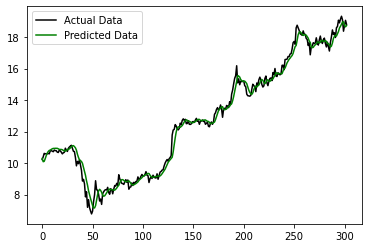

In [31]:
plt.plot(y_test[5:],color="black",label = "Actual Data")
plt.plot(preds[5:] , color="green",label = "Predicted Data")
plt.legend() 
plt.show()

In [32]:
a = model.get_weights()